In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')

In [3]:
df_test = pd.read_excel('Test_set.xlsx')

### Data Assessing
 
##### Quality Issues:
1. Route: 1 missing value (train data) - Completeness 
2. Total_Stops: 1 missing value (train data) - Completeness
3. Price: 2671 missing values (train data) - Completeness
4. Arrival_Time: Inconsistent time. Somewhere time, somwhere time and date (train data) + (test data) - Consistency
5. Airline: Airline company name also with class of travel (train data) + (test data) - Validity
6. Route: 1 missing value (train data) - Completeness
7. Additional_info: No Info and No info both are present - Consistency
8. Total_Stops: Change non-stop to 0 - Validity

##### Tidiness Issues:
1. Dep_Time: Create new column for hours
2. Dep_Time: Create new column for minutes
3. Dep_Time: Change data type from object to datetime
4. Arrival_Time: Create new column for hours
5. Arrival_Time: Create new column for minutes
6. Arrival_Time: Change data type from object to datetime
7. Duration: Create new column for hours
8. Duration: Create new column for minutes
9. Airline: New column for class of travel
10. Date_of_Journey: New column for weekday
11. Date_of_Journey: New column for weekday name
12. Date_of_Journey: New column for year
13. Date_of_Journey: New column for month
14. Date_of_Journey: New column for day

In [4]:
df_train.shape

(10683, 11)

In [5]:
df_test.shape

(2671, 10)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [9]:
for i in df_train.columns:
    print(i,df_train[i].nunique())

Airline 12
Date_of_Journey 44
Source 5
Destination 6
Route 128
Dep_Time 222
Arrival_Time 1343
Duration 368
Total_Stops 5
Additional_Info 10
Price 1870


In [10]:
for i in df_test.columns:
    print(i,df_test[i].nunique())

Airline 11
Date_of_Journey 44
Source 5
Destination 6
Route 100
Dep_Time 199
Arrival_Time 704
Duration 320
Total_Stops 5
Additional_Info 6


### concatenating the train and test dataset for cleaning, visualizations, feature engineering

In [11]:
train = pd.concat([df_train,df_test])

In [12]:
train.shape

(13354, 11)

In [13]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [14]:
train.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [15]:
train['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [16]:
train['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [17]:
train['Dep_Time'].value_counts()

18:55    288
17:00    275
10:00    265
07:05    240
07:10    239
        ... 
22:25      1
12:05      1
21:40      1
03:00      1
22:30      1
Name: Dep_Time, Length: 223, dtype: int64

In [18]:
train['Arrival_Time'].value_counts()

19:00           536
21:00           466
19:15           434
16:10           185
12:35           159
               ... 
13:15 22 May      1
08:50 07 Mar      1
06:50 28 Apr      1
00:25 22 Jun      1
07:45 13 May      1
Name: Arrival_Time, Length: 1451, dtype: int64

In [19]:
train['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [20]:
train['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [21]:
train['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

#### Data cleaning

In [22]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [23]:
train['Depart_Time_Hour'] = pd.to_datetime(train['Dep_Time']).dt.hour

In [24]:
train['Depart_Time_Minutes'] = pd.to_datetime(train['Dep_Time']).dt.minute

In [25]:
train['Arr_Time_Hour'] = pd.to_datetime(train['Arrival_Time']).dt.hour

In [26]:
train['Arr_Time_Minutes'] = pd.to_datetime(train['Arrival_Time']).dt.minute

In [27]:
train['Dep_Time'] = pd.to_datetime(train['Dep_Time'],format='%H:%M').dt.time

In [28]:
train['Arrival_Time'] = train['Arrival_Time'].str.strip().str.split(' ').str.get(0).str.strip()

In [29]:
train['Arrival_Time'] = pd.to_datetime(train['Arrival_Time'],format='%H:%M').dt.time

In [30]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'],format='%d/%m/%Y').dt.date

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13354 non-null  object 
 1   Date_of_Journey      13354 non-null  object 
 2   Source               13354 non-null  object 
 3   Destination          13354 non-null  object 
 4   Route                13353 non-null  object 
 5   Dep_Time             13354 non-null  object 
 6   Arrival_Time         13354 non-null  object 
 7   Duration             13354 non-null  object 
 8   Total_Stops          13353 non-null  object 
 9   Additional_Info      13354 non-null  object 
 10  Price                10683 non-null  float64
 11  Depart_Time_Hour     13354 non-null  int64  
 12  Depart_Time_Minutes  13354 non-null  int64  
 13  Arr_Time_Hour        13354 non-null  int64  
 14  Arr_Time_Minutes     13354 non-null  int64  
dtypes: float64(1), int64(4), object(10)
m

In [32]:
train['Duration_hrs'] = train.Duration.str.strip().str.split(' ').str.get(0).str.strip().str.split('h').str.get(0).str.strip()

In [33]:
temp = train['Duration_hrs'].values
def replacemin(i):
    if 'm' in i:
        return '0'
    else:
        return i

In [34]:
train['Duration_hrs'] = train['Duration_hrs'].apply(replacemin)

In [35]:
train['Duration_hrs'] = train['Duration_hrs'].astype(int)

In [36]:
train['Duration_hrs'].dtype

dtype('int32')

In [37]:
train['Duration_mins'] = train.Duration.str.strip().str.split(' ').str.get(1).str.strip().str.split('m').str.get(0).str.strip()

In [38]:
train['Duration_mins'] = train['Duration_mins'].fillna(0)

In [39]:
train['Duration_mins'] = train['Duration_mins'].astype(int)

In [40]:
train['Duration_mins'].value_counts()

30    1818
0     1286
20    1260
50    1205
45    1154
35    1149
15    1135
55    1121
25    1009
40     803
5      767
10     647
Name: Duration_mins, dtype: int64

In [41]:
train['Duration'] = train['Duration_hrs']*60 + train['Duration_mins']

In [42]:
train = train.reset_index()

In [43]:
train['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [44]:
train['Total_Stops'] = train['Total_Stops'].str.strip().str.split(' ').str.get(0).str.strip()

In [45]:
train['Total_Stops'].value_counts()

1           7056
non-stop    4340
2           1899
3             56
4              2
Name: Total_Stops, dtype: int64

In [46]:
train[train['Total_Stops'] == 'non-stop']

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hrs,Duration_mins
0,0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,non-stop,No info,3897.0,22,20,1,10,2,50
5,5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00:00,11:25:00,145,non-stop,No info,3873.0,9,0,11,25,2,25
11,11,IndiGo,2019-04-18,Kolkata,Banglore,CCU → BLR,20:20:00,22:55:00,155,non-stop,No info,4174.0,20,20,22,55,2,35
12,12,Air India,2019-06-24,Chennai,Kolkata,MAA → CCU,11:40:00,13:55:00,135,non-stop,No info,4667.0,11,40,13,55,2,15
14,14,IndiGo,2019-04-24,Kolkata,Banglore,CCU → BLR,17:15:00,19:50:00,155,non-stop,No info,4804.0,17,15,19,50,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13331,2648,IndiGo,2019-04-01,Delhi,Cochin,DEL → COK,21:05:00,00:20:00,195,non-stop,No info,NaN,21,5,0,20,3,15
13332,2649,SpiceJet,2019-05-06,Banglore,Delhi,BLR → DEL,05:55:00,08:35:00,160,non-stop,No check-in baggage included,NaN,5,55,8,35,2,40
13345,2662,Air India,2019-05-21,Mumbai,Hyderabad,BOM → HYD,13:55:00,15:25:00,90,non-stop,No info,NaN,13,55,15,25,1,30
13348,2665,SpiceJet,2019-06-21,Mumbai,Hyderabad,BOM → HYD,22:45:00,00:15:00,90,non-stop,No check-in baggage included,NaN,22,45,0,15,1,30


In [47]:
temp = train[train['Total_Stops']=='non-stop']

In [48]:
train.loc[temp.index,'Total_Stops'] = 0

In [49]:
train.Total_Stops.value_counts()

1    7056
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

In [50]:
train['Total_Stops'] = train['Total_Stops'].fillna(0)

In [51]:
train['Total_Stops'] = train['Total_Stops'].astype(int)

In [52]:
def airlineclass(item):
    if 'Premium' in item:
        return 'Premium Economy'
    elif 'Business' in item:
        return 'Business'
    else:
        return 'Economy'

In [53]:
train['Airline Class'] = train['Airline'].apply(airlineclass)

In [54]:
train['Airline Class'].value_counts()

Economy            13325
Premium Economy       21
Business               8
Name: Airline Class, dtype: int64

In [55]:
train.head()

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hrs,Duration_mins,Airline Class
0,0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0,No info,3897.0,22,20,1,10,2,50,Economy
1,1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2,No info,7662.0,5,50,13,15,7,25,Economy
2,2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2,No info,13882.0,9,25,4,25,19,0,Economy
3,3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1,No info,6218.0,18,5,23,30,5,25,Economy
4,4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1,No info,13302.0,16,50,21,35,4,45,Economy


In [56]:
train.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [57]:
train.loc[train['Additional_Info']=='No info','Additional_Info'] = 'No Info'

In [58]:
train.Additional_Info.value_counts()

No Info                         10496
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [59]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])

In [60]:
train['Weekday_Journey'] = train['Date_of_Journey'].dt.weekday

In [61]:
train['Weekday_Journey'].value_counts()

2    2621
0    2307
3    2283
5    2097
6    1849
4    1121
1    1076
Name: Weekday_Journey, dtype: int64

In [62]:
d = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
train['Weekday_name_Journey'] = train['Weekday_Journey'].map(d)

In [63]:
train['Weekday_name_Journey'].value_counts()

Wednesday    2621
Monday       2307
Thursday     2283
Saturday     2097
Sunday       1849
Friday       1121
Tuesday      1076
Name: Weekday_name_Journey, dtype: int64

In [64]:
train['Year_Journey'] = train['Date_of_Journey'].dt.year
train['Month_Journey'] = train['Date_of_Journey'].dt.month
train['Date_Journey'] = train['Date_of_Journey'].dt.day

In [65]:
temp = train.groupby(['Date_of_Journey','Source'])['Source'].count()

In [66]:
temp = temp.reset_index(name = 'no_of_takeoff')

In [67]:
train = pd.merge(train,temp,on=['Date_of_Journey','Source'],how='left')

In [68]:
train.head(3)

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,...,Arr_Time_Minutes,Duration_hrs,Duration_mins,Airline Class,Weekday_Journey,Weekday_name_Journey,Year_Journey,Month_Journey,Date_Journey,no_of_takeoff
0,0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0,...,10,2,50,Economy,6,Sunday,2019,3,24,123
1,1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2,...,15,7,25,Economy,2,Wednesday,2019,5,1,226
2,2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2,...,25,19,0,Economy,6,Sunday,2019,6,9,291


In [69]:
train[train.Route.isnull()]

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,...,Arr_Time_Minutes,Duration_hrs,Duration_mins,Airline Class,Weekday_Journey,Weekday_name_Journey,Year_Journey,Month_Journey,Date_Journey,no_of_takeoff
9039,9039,Air India,2019-05-06,Delhi,Cochin,NaN,09:45:00,09:25:00,1420,0,...,25,23,40,Economy,0,Monday,2019,5,6,32


In [70]:
train[(train['Source']=='Delhi') & (train['Destination']=='Cochin')&(train['Duration']==1420)&(train['Price']==7480.0)]

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,...,Arr_Time_Minutes,Duration_hrs,Duration_mins,Airline Class,Weekday_Journey,Weekday_name_Journey,Year_Journey,Month_Journey,Date_Journey,no_of_takeoff
1616,1616,Air India,2019-05-24,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1,...,25,23,40,Economy,4,Friday,2019,5,24,33
2554,2554,Air India,2019-05-15,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1,...,25,23,40,Economy,2,Wednesday,2019,5,15,192
4351,4351,Air India,2019-06-27,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1,...,25,23,40,Economy,3,Thursday,2019,6,27,308
7896,7896,Air India,2019-06-12,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1,...,25,23,40,Economy,2,Wednesday,2019,6,12,314
9039,9039,Air India,2019-05-06,Delhi,Cochin,NaN,09:45:00,09:25:00,1420,0,...,25,23,40,Economy,0,Monday,2019,5,6,32


In [71]:
train.loc[9039,'Route'] = 'DEL → MAA → COK'

In [72]:
train.loc[9039,'Route']

'DEL → MAA → COK'

In [73]:
train.loc[9039,'Total_Stops']=1

In [74]:
train.loc[9039,'Total_Stops']

1

In [75]:
train['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [76]:
train.loc[train['Airline'] == 'Multiple carriers Premium economy','Airline']='Multiple carriers'
train.loc[train['Airline'] == 'Jet Airways Business','Airline']='Jet Airways'
train.loc[train['Airline'] == 'Vistara Premium economy','Airline']='Vistara'

In [77]:
train.to_excel('Airline_Analysis.xlsx',index=False)

### Data Visualization

#### 1. Univariate Analysis

Text(0.5, 0, '')

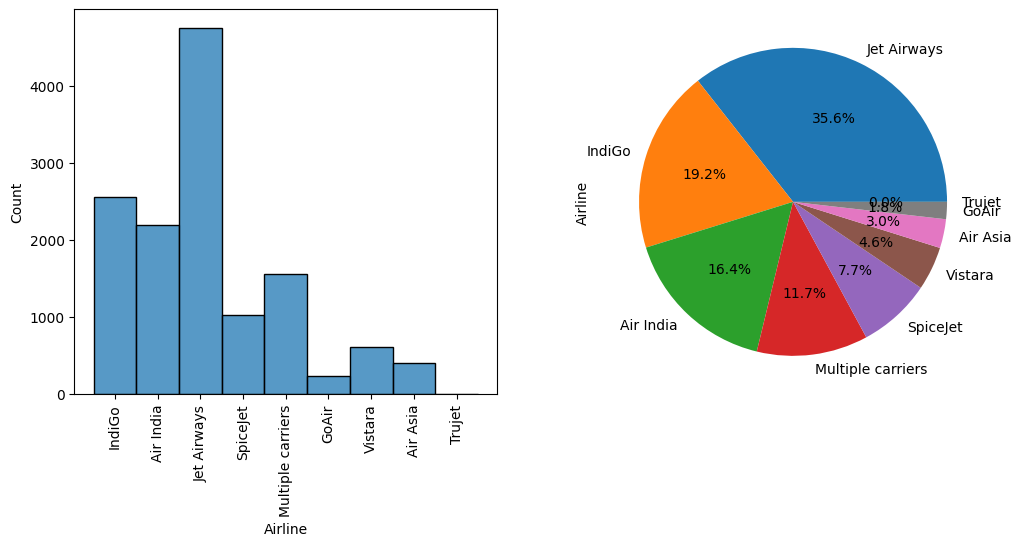

In [78]:
plt.figure(figsize=(12,5))
plt.subplot()

plt.subplot(1,2,1)
sns.histplot(train['Airline'],edgecolor='black')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
train['Airline'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.xlabel(None)

Text(0.5, 0, '')

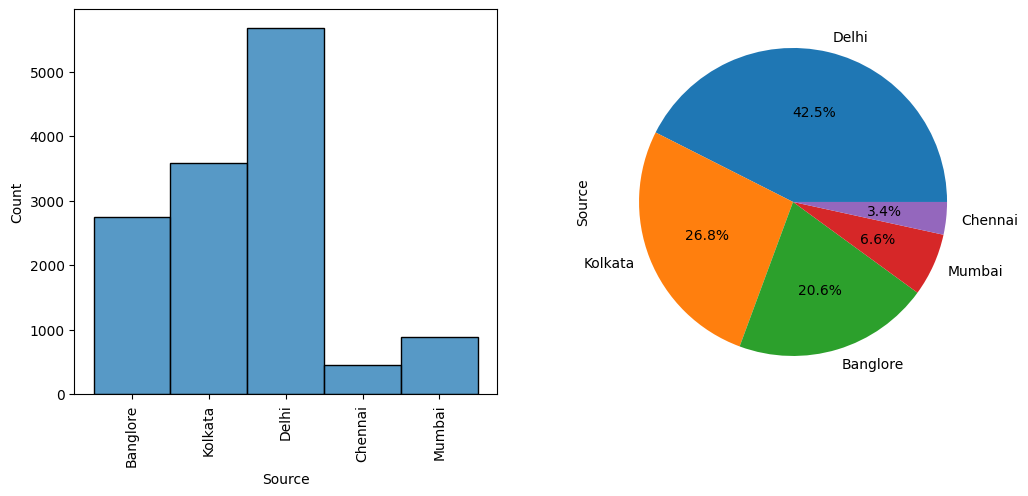

In [79]:
plt.figure(figsize=(12,5))
plt.subplot()

plt.subplot(1,2,1)
sns.histplot(train['Source'],edgecolor='black')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
train['Source'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.xlabel(None)

Text(0.5, 0, '')

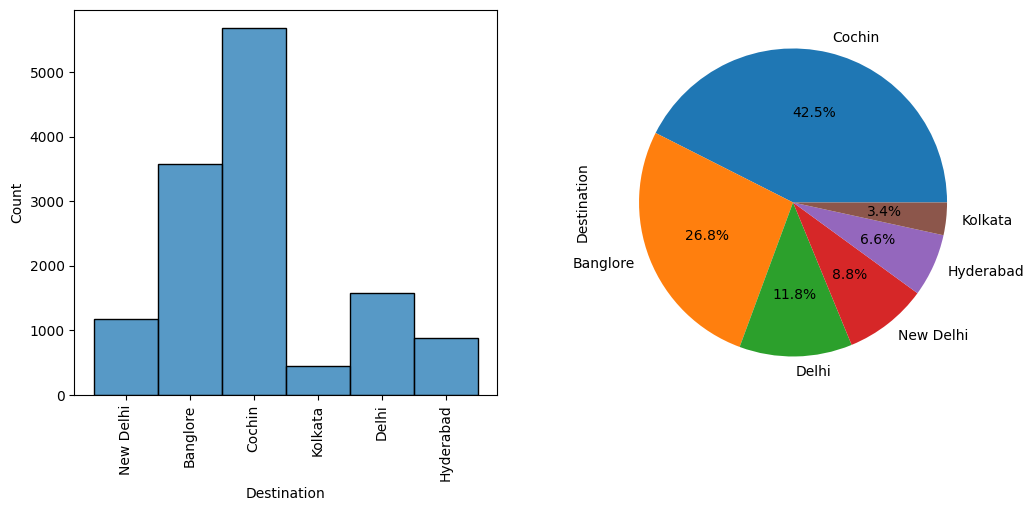

In [80]:
plt.figure(figsize=(12,5))
plt.subplot()

plt.subplot(1,2,1)
sns.histplot(train['Destination'],edgecolor='black')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
train['Destination'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.xlabel(None)

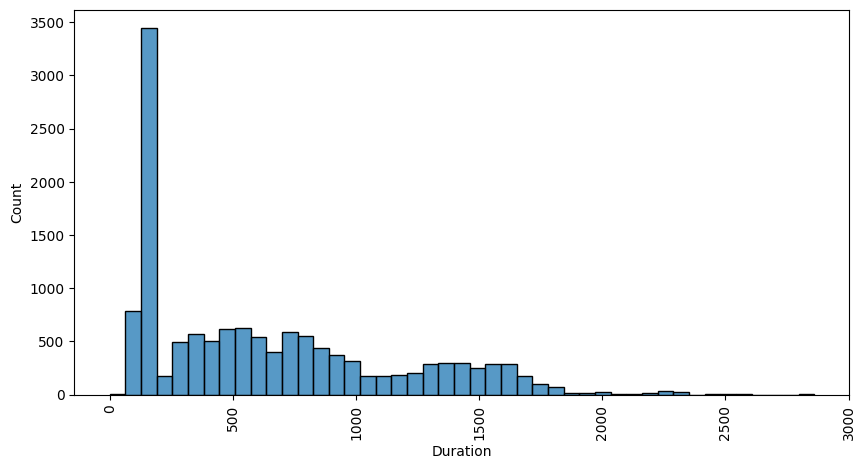

In [81]:
plt.figure(figsize=(10,5))
sns.histplot(train['Duration'])
plt.xticks(rotation=90)
plt.show()

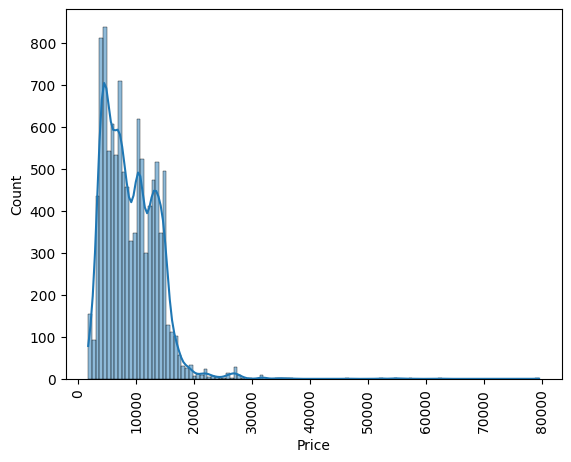

In [82]:
sns.histplot(train['Price'],kde=True)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, '')

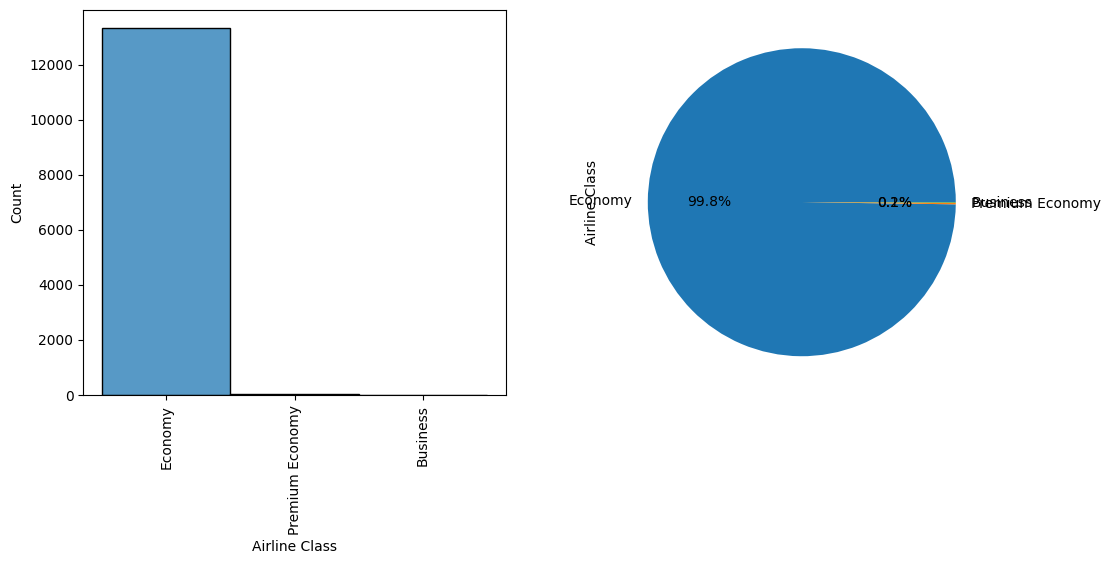

In [83]:
plt.figure(figsize=(12,5))
plt.subplot()

plt.subplot(1,2,1)
sns.histplot(train['Airline Class'],edgecolor='black')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
train['Airline Class'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.xlabel(None)

Text(0.5, 0, '')

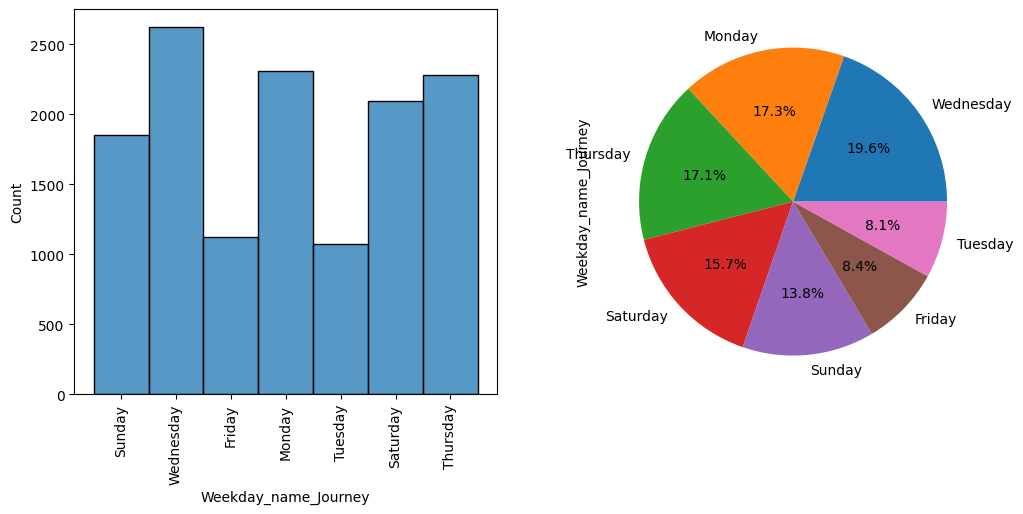

In [84]:
plt.figure(figsize=(12,5))
plt.subplot()

plt.subplot(1,2,1)
sns.histplot(train['Weekday_name_Journey'],edgecolor='black')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
train['Weekday_name_Journey'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.xlabel(None)

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

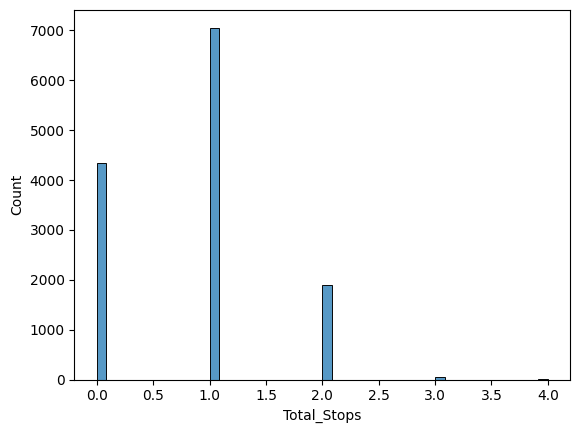

In [85]:
sns.histplot(data=train,x=train['Total_Stops'])

<AxesSubplot:ylabel='Total_Stops'>

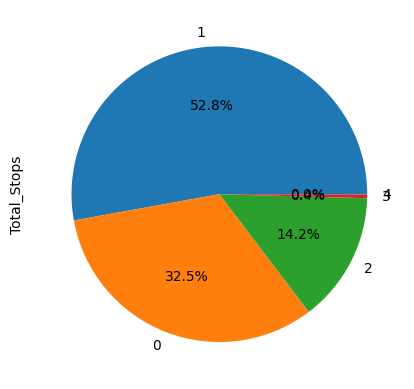

In [86]:
train['Total_Stops'].value_counts().plot(kind='pie',autopct='%0.1f%%')

#### 2. Bivariate Analysis

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


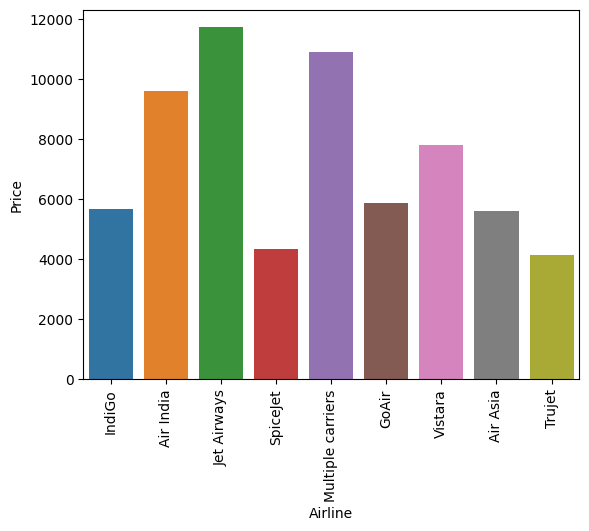

In [87]:
sns.barplot(data=train,x=train['Airline'],y=train['Price'],estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

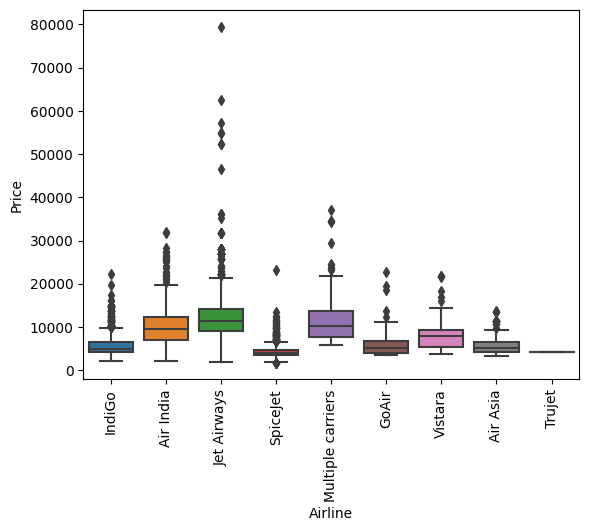

In [88]:
sns.boxplot(data=train,x=train['Airline'],y=train['Price'])
plt.xticks(rotation=90)
plt.show()

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


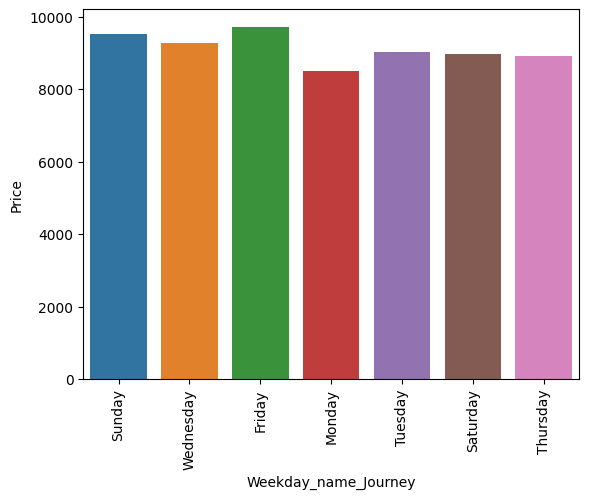

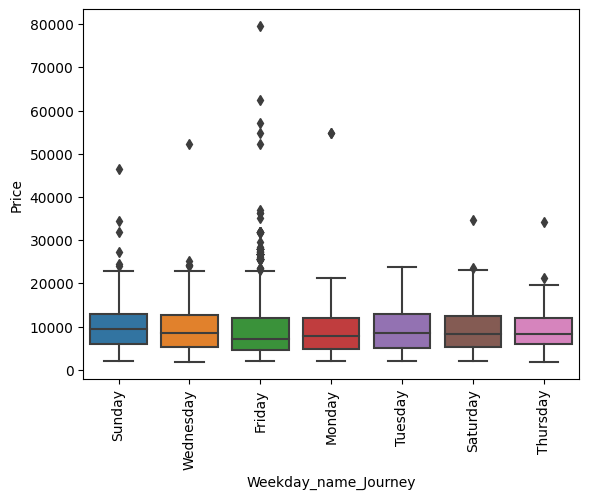

In [89]:
sns.barplot(data=train,x=train['Weekday_name_Journey'],y=train['Price'],estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=train,x=train['Weekday_name_Journey'],y=train['Price'])
plt.xticks(rotation=90)
plt.show()

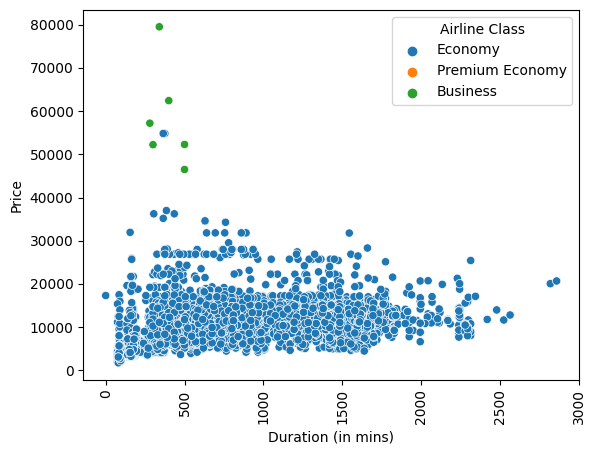

In [90]:
sns.scatterplot(data=train,x=train['Duration'],y=train['Price'],hue='Airline Class')
plt.xticks(rotation=90)
plt.xlabel('Duration (in mins)')
plt.show()

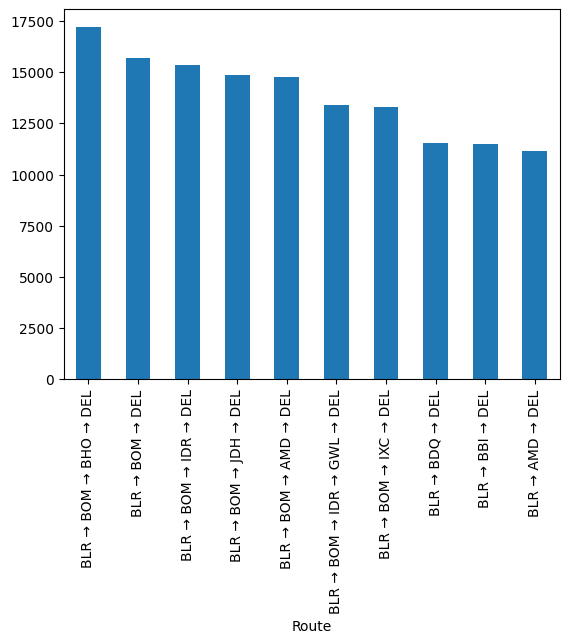

In [91]:
train.groupby(train['Route'])['Price'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
temp=train.groupby(train['Route'])['Price'].mean().head(10).sort_values(ascending=False)

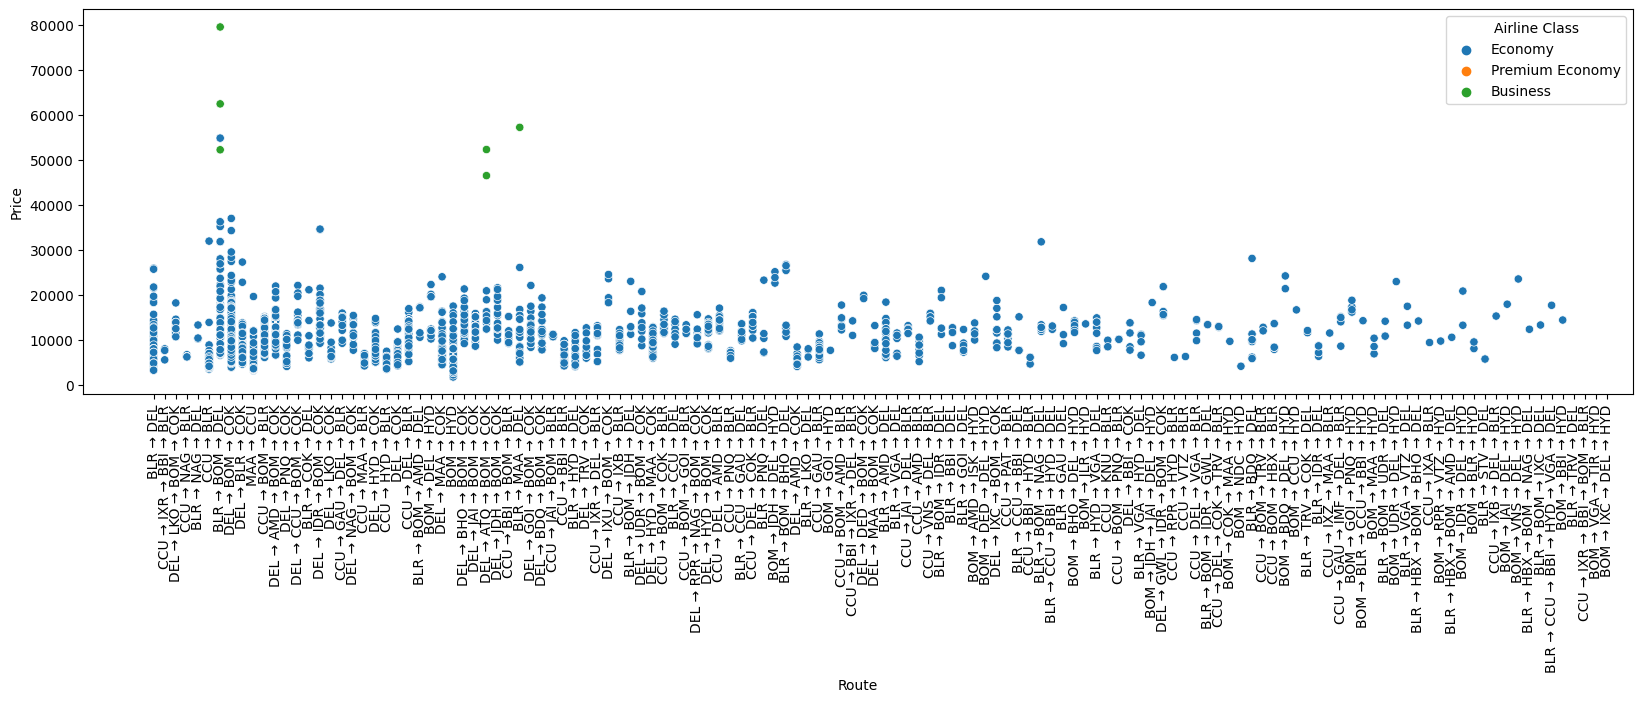

In [92]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=train,x=train['Route'],y=train['Price'],hue=train['Airline Class'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Depart_Time_Hour', ylabel='Price'>

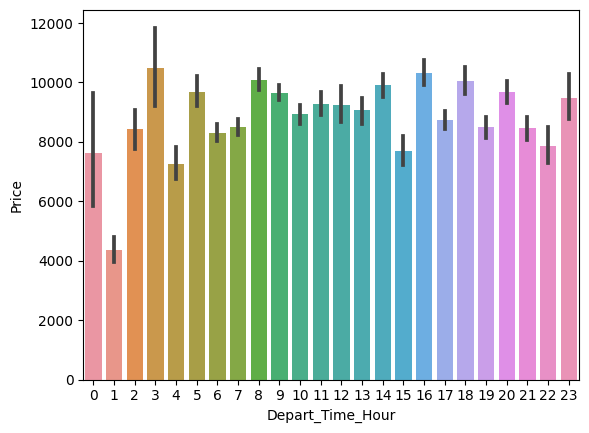

In [93]:
sns.barplot(data=train,x='Depart_Time_Hour',y='Price')

<AxesSubplot:xlabel='Depart_Time_Hour', ylabel='count'>

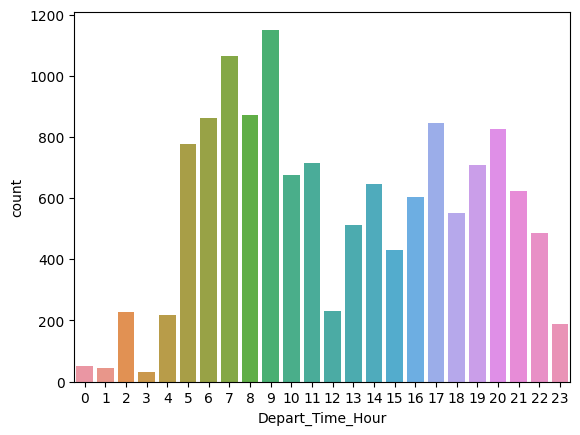

In [94]:
sns.countplot(data=train,x=train['Depart_Time_Hour'])

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

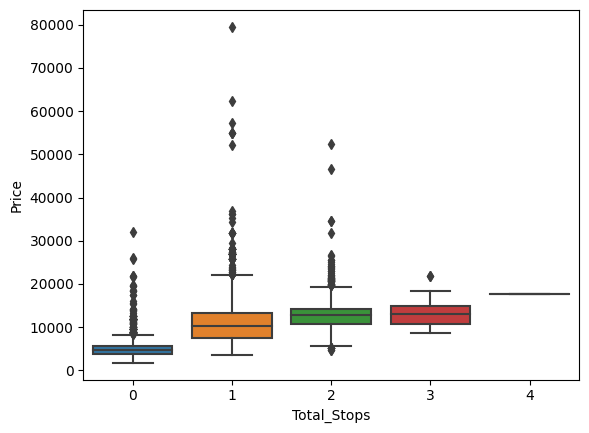

In [95]:
sns.boxplot(data=train,x='Total_Stops',y='Price')

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

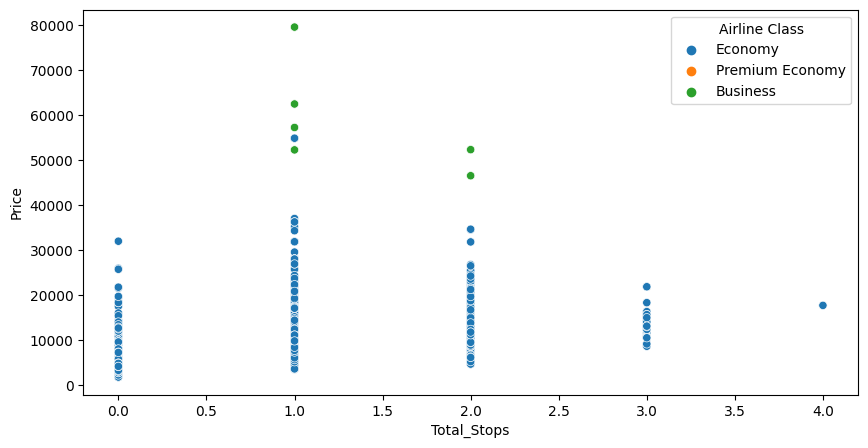

In [96]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=train,x='Total_Stops',y='Price',hue='Airline Class')

In [979]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [980]:
df = train.copy()

In [981]:
train = train.drop(columns = ['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1)

In [982]:
train = train.drop(columns = 'index',axis=1)

In [983]:
train_int_data = train.select_dtypes(include = 'int')

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  after removing the cwd from sys.path.


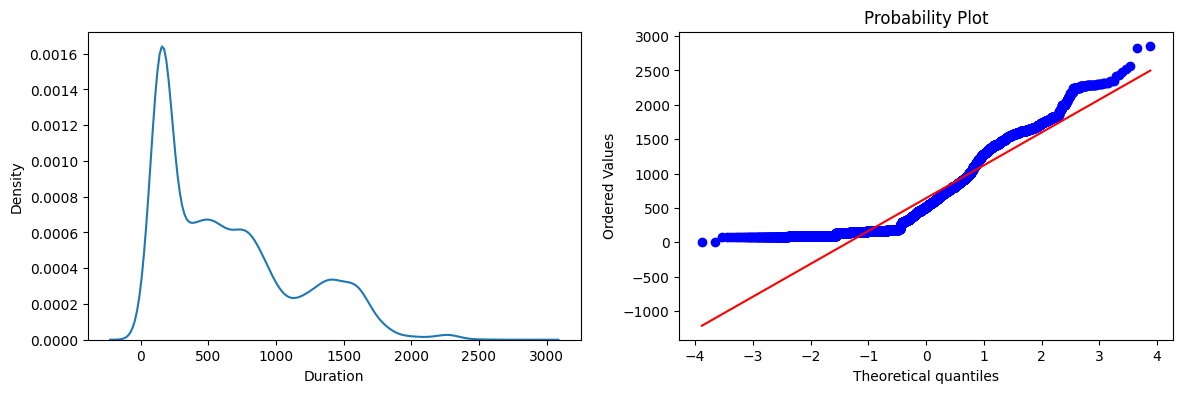

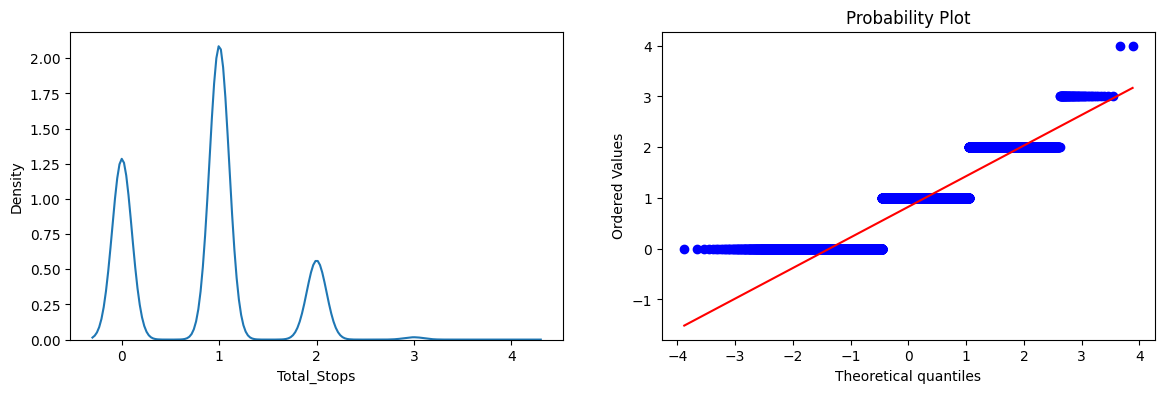

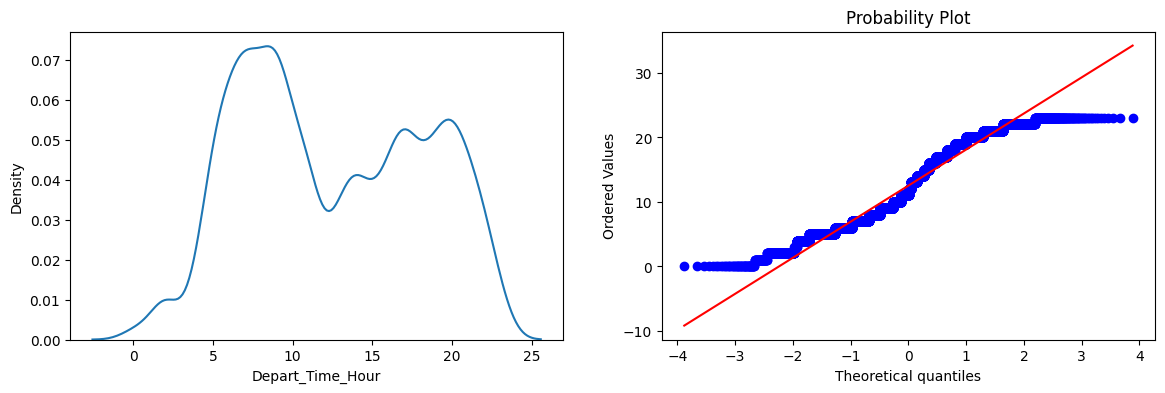

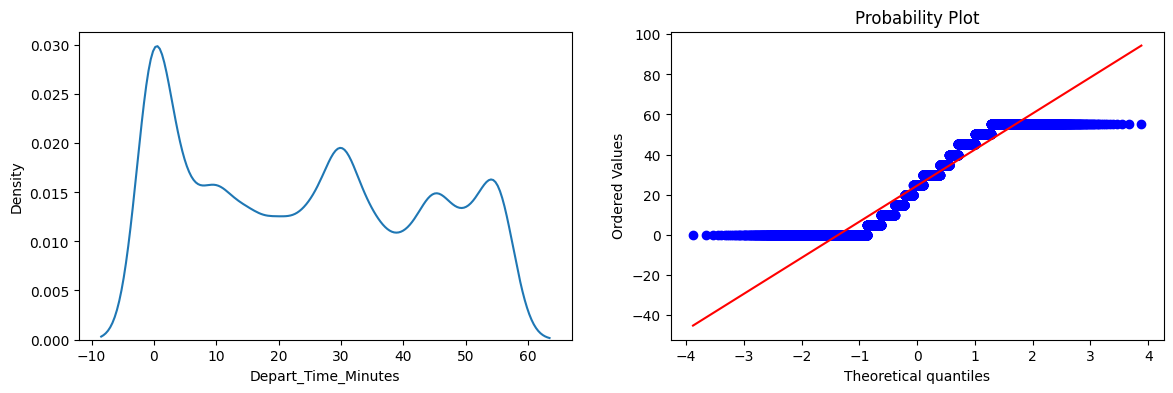

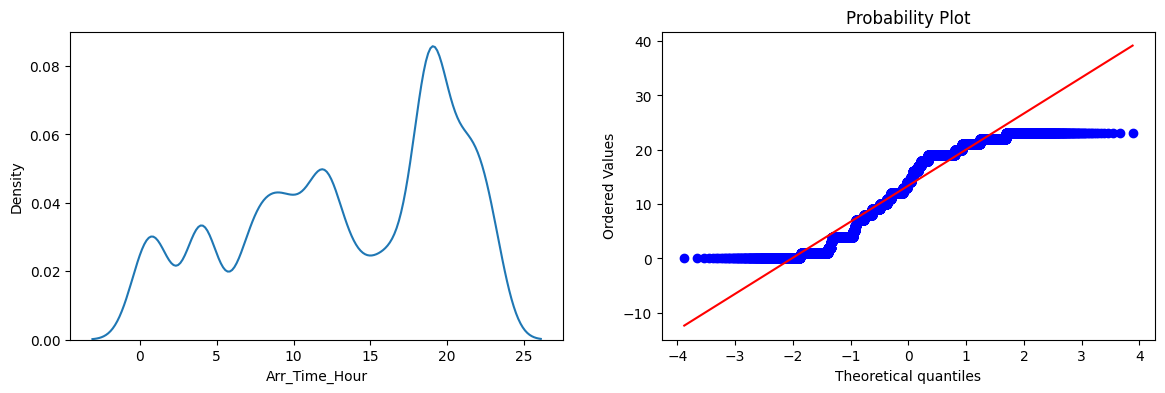

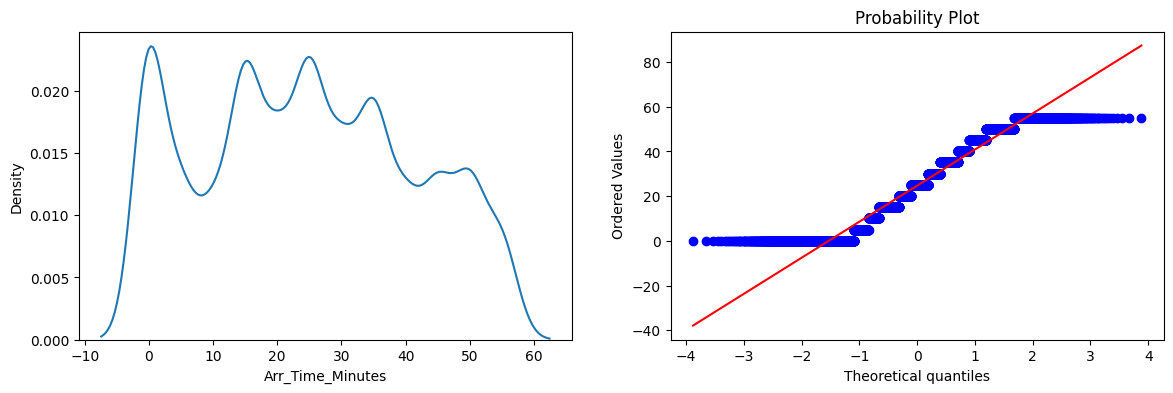

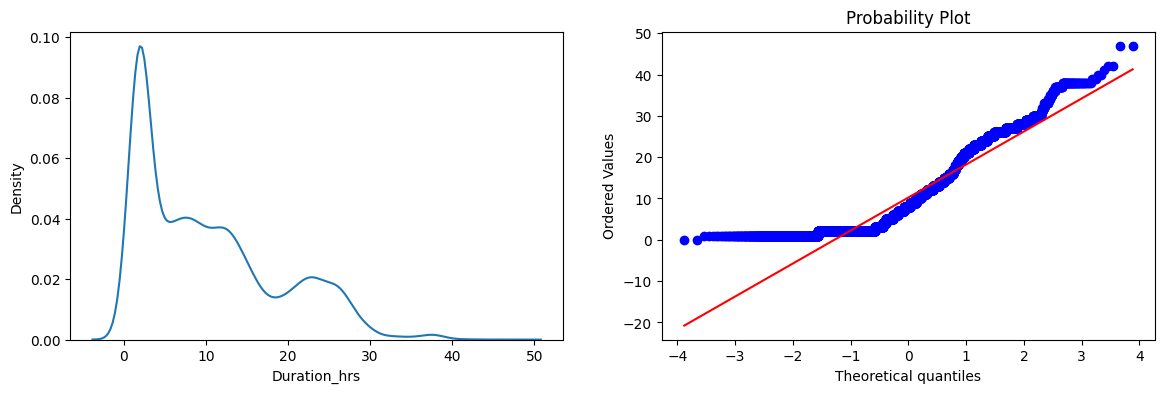

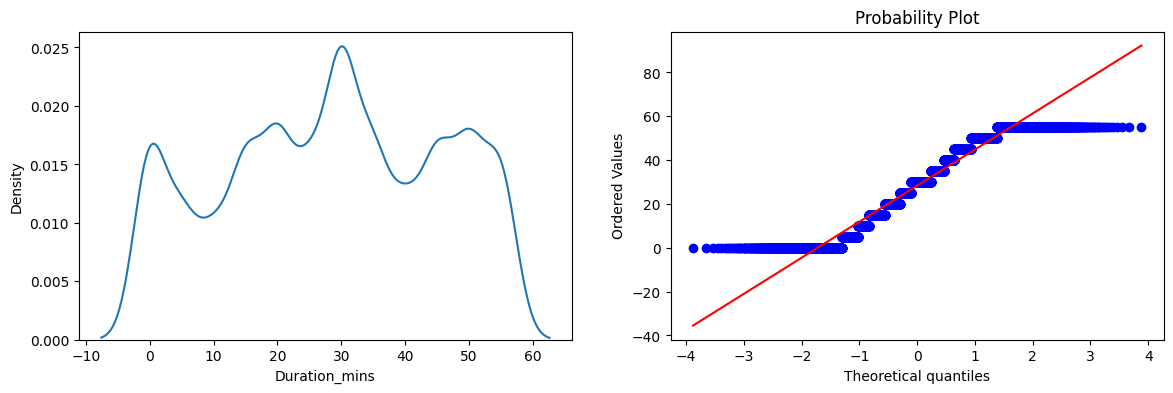

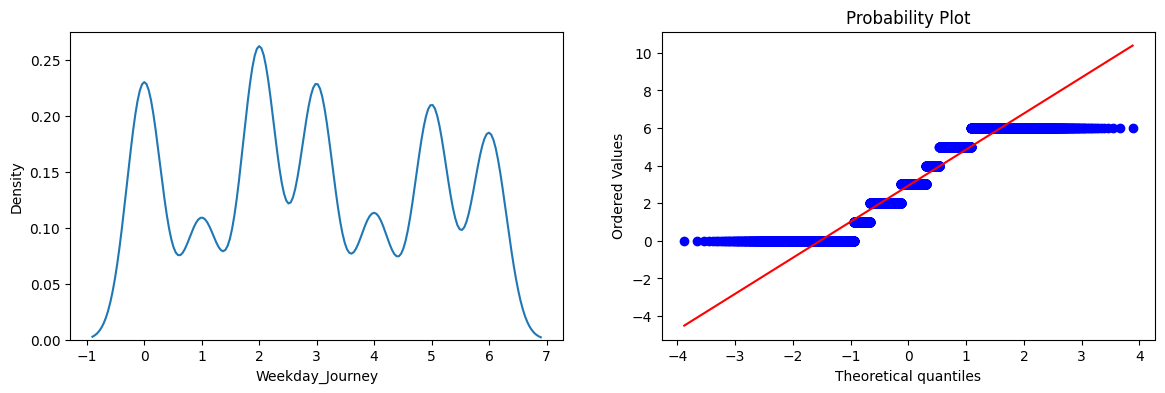

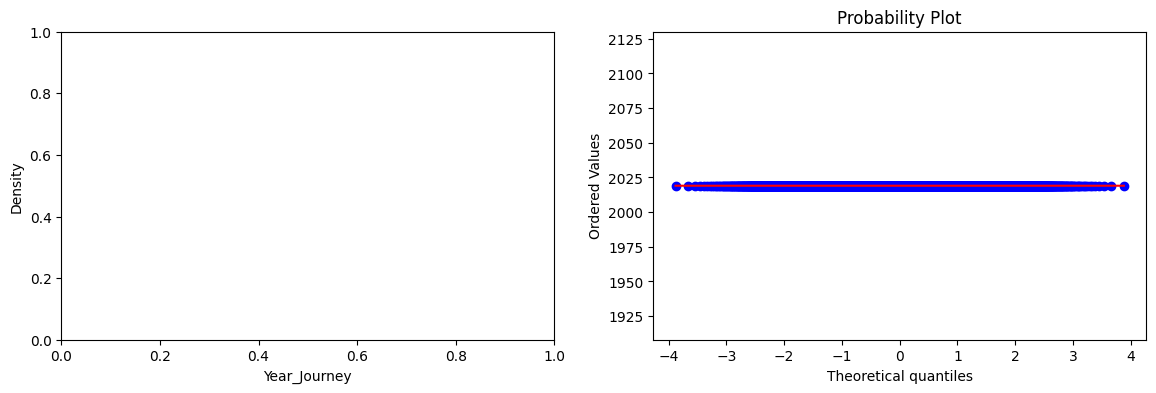

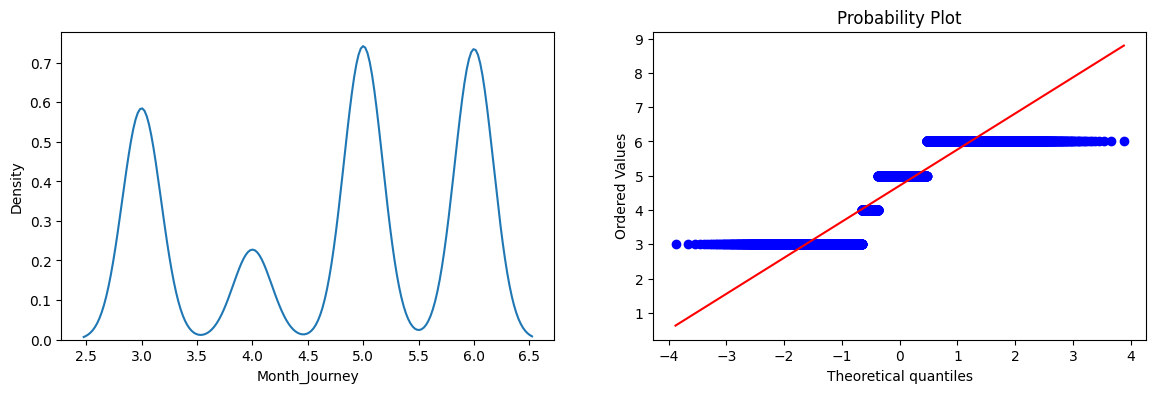

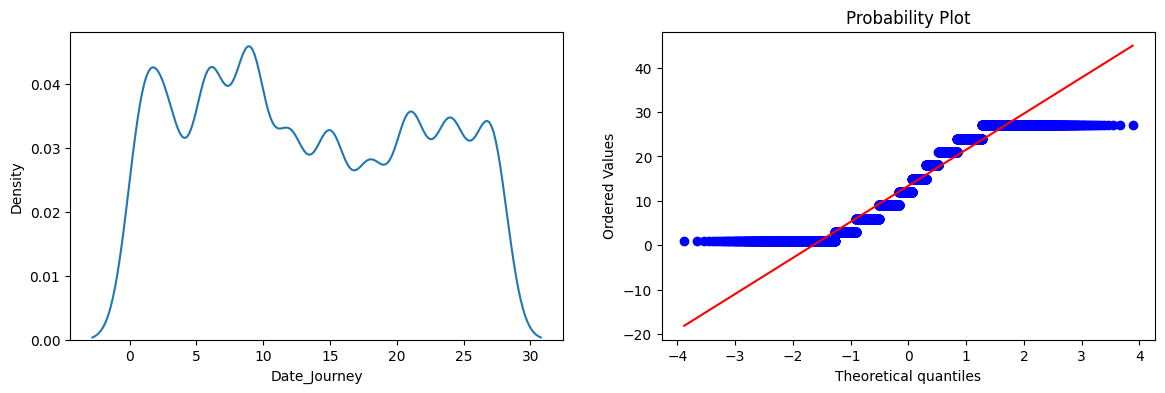

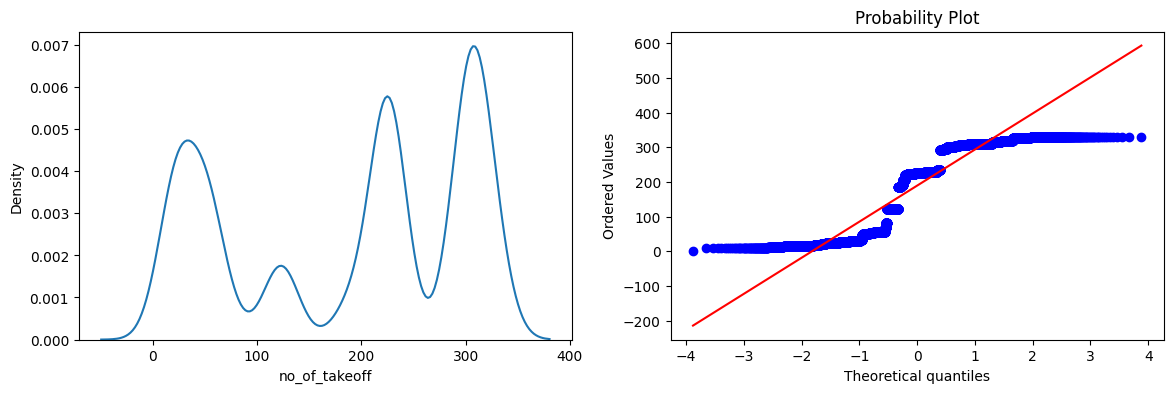

In [984]:
for i in train_int_data.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(train_int_data[i])
    
    plt.subplot(122)
    stats.probplot(train_int_data[i],dist='norm',plot=plt)

In [833]:
X = train.drop(columns = ['Price'],axis=1)

In [834]:
y = train.loc[:,'Price']

In [835]:
y=pd.DataFrame(y)

In [836]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [1009]:
ohe = OneHotEncoder(drop='first',sparse=False)

In [1010]:
X_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hrs,Duration_mins,Airline Class,Weekday_Journey,Weekday_name_Journey,Year_Journey,Month_Journey,Date_Journey,no_of_takeoff
1919,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,375,1,In-flight meal not included,7,0,13,15,6,15,Economy,4,Friday,2019,3,15,123
2077,IndiGo,Banglore,Delhi,BLR → DEL,175,0,No Info,18,55,21,50,2,55,Economy,5,Saturday,2019,5,18,55
10543,IndiGo,Kolkata,Banglore,CCU → BLR,165,0,No Info,9,35,12,20,2,45,Economy,3,Thursday,2019,4,18,23
13070,Air India,Mumbai,Hyderabad,BOM → HYD,90,0,No Info,13,55,15,25,1,30,Economy,0,Monday,2019,3,18,28
5711,Air India,Mumbai,Hyderabad,BOM → BHO → DEL → HYD,2245,2,No Info,6,0,19,25,37,25,Economy,2,Wednesday,2019,3,6,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1655,1,In-flight meal not included,9,0,12,35,27,35,Economy,0,Monday,2019,4,1,30
12034,Jet Airways,Delhi,Cochin,DEL → BOM → COK,455,1,No Info,20,50,4,25,7,35,Economy,2,Wednesday,2019,3,6,294
12259,IndiGo,Delhi,Cochin,DEL → MAA → COK,315,1,No Info,7,15,12,30,5,15,Economy,5,Saturday,2019,5,18,310
12455,Vistara,Delhi,Cochin,DEL → COK,190,0,No Info,14,40,17,50,3,10,Economy,1,Tuesday,2019,6,18,9


In [1013]:
X_train_transformed = ohe.fit_transform(X_train[['Airline','Source','Destination','Additional_Info','Airline Class','Weekday_name_Journey','Year_Journey']])

In [1015]:
X_test_transformed = ohe.fit_transform(X_test[['Airline','Source','Destination','Additional_Info','Airline Class','Weekday_name_Journey','Year_Journey']])

In [1019]:
X_train_transformed.shape

(10683, 33)

In [1020]:
X_test_transformed.shape

(2671, 28)

In [1023]:
X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

In [1026]:
X_train_transformed # need to add route as well

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10680,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1038]:
X_train_transformed = pd.concat([X_train['Route'],X_train_transformed],axis=1)

In [1040]:
X_train_transformed

,Route,Route,Route,Route,Route,0,1,2,3,4,...,23,24,25,26,27,28,29,30,31,32
0,BLR → DEL,BLR → DEL,BLR → DEL,BLR → DEL,BLR → DEL,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR,CCU → IXR → BBI → BLR,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK,DEL → LKO → BOM → COK,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,BLR → NAG → DEL,BLR → NAG → DEL,BLR → NAG → DEL,BLR → NAG → DEL,BLR → NAG → DEL,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,CCU → DEL → BLR,CCU → DEL → BLR,CCU → DEL → BLR,CCU → DEL → BLR,CCU → DEL → BLR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13350,CCU → BLR,CCU → BLR,CCU → BLR,CCU → BLR,CCU → BLR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13351,DEL → BOM → COK,DEL → BOM → COK,DEL → BOM → COK,DEL → BOM → COK,DEL → BOM → COK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13352,DEL → BOM → COK,DEL → BOM → COK,DEL → BOM → COK,DEL → BOM → COK,DEL → BOM → COK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
